In [1]:
import os
import re
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

sns.color_palette('deep')
sns.set_style('white')

palette = sns.color_palette()

LINEWIDTH = 1.5

workdir = os.getcwd()
pdf_path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)

In [2]:
# code for contents of plot

# filename = "training_results_com_2tran_LNAV_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv"


def read_file(filename, limit=5500, val=False):
    if val:
        # path = os.path.relpath('..\\..\\..\\results\\validation_results', workdir)
        path = os.path.relpath('..\\..\\..\\results\\validation_results\\complete_experiments_final', workdir)
    else:
        # path = os.path.relpath('..\\..\\..\\results\\training_results', workdir)
        path = os.path.relpath('..\\..\\..\\results\\training_results\\complete_experiment_final', workdir)

    file = os.path.join(path, filename)

    print(file)

    data = []

    count = 0

    with open(file) as f:
        csvreader = csv.reader(f)
        keys = next(csvreader)

        result = dict.fromkeys(keys)

        first = True

        for row in csvreader:
            if first:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key] = [int(item)]
                    else:
                        try:
                            result[key] = [float(item)]
                        except ValueError:
                            result[key] = [item]
                first = False
            else:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key].append(int(item))
                    else:
                        try:
                            result[key].append(float(item))
                        except ValueError:
                            result[key].append(item)

            count += 1

            if count > limit:
                break

    return result

In [3]:
def single_reward_plot(filename, result_dict):
    result = list(result_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True)
    plt.axhline(y=0, linewidth=LINEWIDTH, color='k')
    # fig.suptitle(filename, fontsize=24)

    running_avg = uniform_filter1d(result[0]['average reward'], 20)
    axs.plot(running_avg, linewidth=LINEWIDTH, color=palette[0])
    sns.lineplot(data=result[0]['average reward'], linewidth=LINEWIDTH, alpha=.3)

    # axs.set_title(list(result_dict.keys())[0])

    axs.set(xlabel='Episode', ylabel='Reward')
    axs.set_ylim(bottom=-8, top=4)
    axs.set_xlim(left=0, right=6200)

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()



In [4]:
def single_sep_plot(filename, result):
    data_dict = {}

    for f in list(result.keys()):
        data_dict[f] = {"Conflicts": result[f]['conflicts'], "LoS": result[f]['LoS']}

    data = list(data_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True)
    plt.axhline(y=0, linewidth=LINEWIDTH, color='k')
    # fig.suptitle(filename, fontsize=24)

    sns.lineplot(data=data[0]['Conflicts'], linewidth=LINEWIDTH, ax=axs, label='Conflicts')
    sns.lineplot(data=data[0]['LoS'], linewidth=LINEWIDTH, ax=axs, alpha=.3, color='orange')
    running_avg = uniform_filter1d(data[0]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs, color=palette[1], label='LoS')
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Episode', ylabel='Count')
    axs.set_ylim(bottom=-1, top=23)
    axs.set_xlim(left=0, right=6200)

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    # fig.legend(handles, labels, bbox_to_anchor=(1.045,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    axs.legend(handles, labels, loc='center right')
    # axs.get_legend().remove()

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()



In [5]:
def single_reward_val(filename, result_dict):
    result = list(result_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True)
    plt.axhline(y=0, linewidth=LINEWIDTH, color='k')
    # fig.suptitle("Validation " + filename, fontsize=24)

    sns.lineplot(data=result[0]['rewards'], linewidth=LINEWIDTH, ax=axs)
    lower = np.array(result[0]['rewards']) - np.array(result[0]['rewardsstd'])
    upper = np.array(result[0]['rewards']) + np.array(result[0]['rewardsstd'])
    axs.fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    fig.suptitle(filename, fontsize=16)

    axs.set(xlabel='Run', ylabel='Reward')
    axs.set_ylim(bottom=-8, top=4)
    axs.set_xlim(left=0, right=120)

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()



In [6]:
def single_separation_val(filename, result):
    data_dict = {}

    for f in list(result.keys()):
        data_dict[f] = {'conflicts': result[f]['conflicts'], 'LoS': result[f]['LoS'], 'LoSstd': result[f]['LoSstd']}

    data = list(data_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True)
    plt.axhline(y=0, linewidth=LINEWIDTH, color='k')
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(x=range(0, len(data[0]['conflicts'])), y=data[0]['conflicts'], linewidth=LINEWIDTH, ax=axs, label="Conflicts")
    sns.lineplot(x=range(0, len(data[0]['LoS'])), y=data[0]['LoS'], linewidth=LINEWIDTH, ax=axs, label="LoS")
    lower = np.array(data[0]['LoS']) - np.array(data[0]['LoSstd'])
    upper = np.array(data[0]['LoS']) + np.array(data[0]['LoSstd'])
    axs.fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Run', ylabel='Count')
    axs.set_ylim(bottom=-1, top=23)
    axs.set_xlim(left=0, right=120)

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    # fig.legend(handles, labels, bbox_to_anchor=(1.045,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    axs.legend(handles, labels, loc='center right')
    # axs.get_legend().remove()

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()



In [7]:
def single_action_val(filename, result):
    actions_dict = {}
    for f in list(result.keys()):
        actions_dict[f] = {'LEFT': result[f]['Left'], 'Lstd': result[f]['Leftstd'], 'RIGHT': result[f]['Right'],
                           'Rstd': result[f]['Rightstd'], 'LNAV': result[f]['LNAV'], 'Lnavstd': result[f]['LNAVstd']}

    actions = list(actions_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True, sharex=True)
    plt.axhline(y=0, linewidth=LINEWIDTH, color='k')
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(x=range(0, len(actions[0]['LEFT'])), y=actions[0]['LEFT'], linewidth=LINEWIDTH, label="Left")
    sns.lineplot(x=range(0, len(actions[0]['RIGHT'])), y=actions[0]['RIGHT'], linewidth=LINEWIDTH, label="Right")
    sns.lineplot(x=range(0, len(actions[0]['LNAV'])), y=actions[0]['LNAV'], linewidth=LINEWIDTH, label="LNAV")
    lower_l = np.array(actions[0]['LEFT']) - np.array(actions[0]['Lstd'])
    upper_l = np.array(actions[0]['LEFT']) + np.array(actions[0]['Lstd'])
    axs.fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[0]['RIGHT']) - np.array(actions[0]['Rstd'])
    upper_r = np.array(actions[0]['RIGHT']) + np.array(actions[0]['Rstd'])
    axs.fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[0]['LNAV']) - np.array(actions[0]['Lnavstd'])
    upper_v = np.array(actions[0]['LNAV']) + np.array(actions[0]['Lnavstd'])
    axs.fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Run', ylabel='Count')
    axs.set_ylim(bottom=-10, top=250)
    axs.set_xlim(left=0, right=120)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    # fig.legend(handles, labels, bbox_to_anchor=(1.045,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    axs.legend(handles, labels, loc='upper right')
    # axs.get_legend().remove()

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    pass

In [8]:
def single_action_plot(filename, result):
    actions_dict = {}
    for f in list(result.keys()):
        actions_dict[f] = {'LEFT': result[f]['action LEFT'], 'RIGHT': result[f]['action RIGHT'], 'LNAV': result[f]['action LNAV']}

    actions = list(actions_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True, sharex=True)
    plt.axhline(y=0, linewidth=LINEWIDTH, color='k')
    # fig.suptitle(filename, fontsize=24)

    sns.lineplot(data=actions[0]['LEFT'], linewidth=LINEWIDTH, alpha=.3, color="lightblue")
    running_avg = uniform_filter1d(actions[0]['LEFT'][20:], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs, color=palette[0], label='Left')
    sns.lineplot(data=actions[0]['RIGHT'], linewidth=LINEWIDTH, alpha=.3, color="orange")
    running_avg = uniform_filter1d(actions[0]['RIGHT'][20:], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs, color=palette[1], label='Right')
    sns.lineplot(data=actions[0]['LNAV'], linewidth=LINEWIDTH, alpha=.3, color="green")
    running_avg = uniform_filter1d(actions[0]['LNAV'][20:], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs, color=palette[2], label='LNAV')
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Episode', ylabel='Count')
    axs.set_ylim(bottom=-10, top=250)
    axs.set_xlim(left=0, right=6200)

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    # fig.legend(handles, labels, bbox_to_anchor=(1.035,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    axs.legend(handles, labels, loc='upper right')
    # axs.get_legend().remove()

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()

In [9]:
def single_loss_plot(filename, result):
    loss_indices_dict = {}
    loss_data_dict = {}

    for f in list(result.keys()):
        loss_indices_dict[f] = [i for i, j in enumerate(result[f]['loss']) if j != ""]
        loss_data_dict[f] = [result[f]['loss'][x] for x in loss_indices_dict[f]]

    loss_indices = list(loss_indices_dict.values())
    loss_data = list(loss_data_dict.values())

    fig, axs = plt.subplots(1, 1, sharey=True, sharex=True)
    plt.axhline(y=0, linewidth=LINEWIDTH, color='k')
    # fig.suptitle(filename, fontsize=24)

    sns.lineplot(x=loss_indices[0][20:], y=loss_data[0][20:], linewidth=LINEWIDTH)
    # running_avg = uniform_filter1d(loss_data[0][20:], 20)
    # sns.lineplot(x=loss_indices[0][20:], y=running_avg, linewidth=LINEWIDTH)
    # axs.set_title(list(result.keys())[0])

    axs.set(xlabel='Episode', ylabel='Loss')

    axs.label_outer()

    axs.grid(visible=True, which='major', color='#666666', linestyle='-')
    axs.minorticks_on()
    axs.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    f_name = os.path.join(pdf_path, filename)
    plt.savefig(f_name + ".pdf", bbox_inches="tight")

    plt.show()

..\..\..\results\validation_results\complete_experiments_final\training_results_com_2tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
..\..\..\results\validation_results\complete_experiments_final\training_results_com_3tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
..\..\..\results\validation_results\complete_experiments_final\training_results_com120_3tran_test_SPARSE_128batch_100000buffer.csv


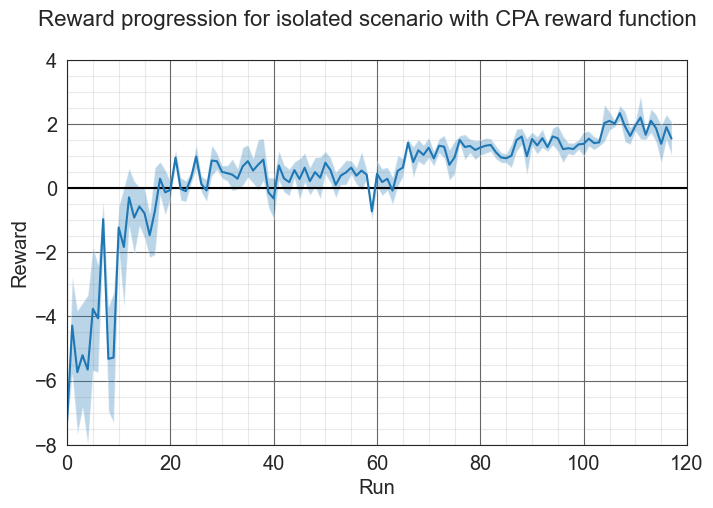

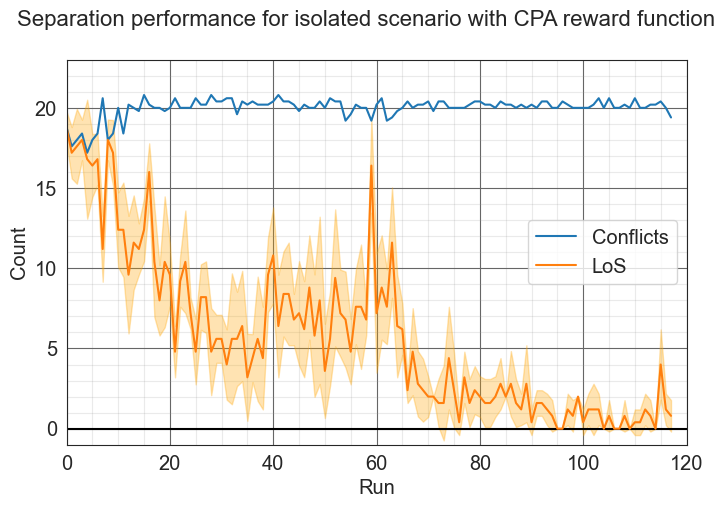

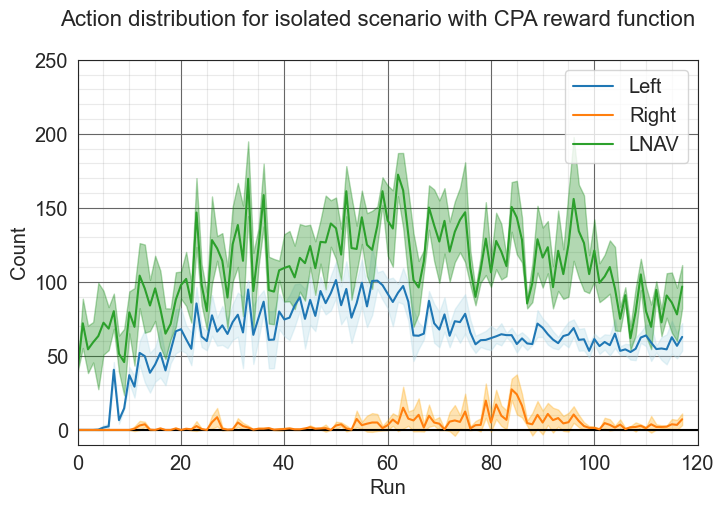

In [10]:
f_data = {}
f1_data = {}
f2_data = {}

f = "training_results_com_2tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv"
f1 = "training_results_com_3tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv"
# f2 = "training_results_com120_3tran_test_LNAV_64batch_1000000buffer.csv"
f2 = "training_results_com120_3tran_test_SPARSE_128batch_100000buffer.csv"
# f = "training_results_comLR_test_0_001.csv"
# f1 = "training_results_comLR_test_0_0001.csv"
# f2 = "training_results_comLR_test_1e-05.csv"

# x = re.search("\d+batch", f).group()
# y = re.search("\d+buffer", f).group()
# name = x + " " + y

# -----------------------------------------------------------------------------------------------------------------------------
#                                                       TRAINING
# -----------------------------------------------------------------------------------------------------------------------------

# f_data[f] = read_file(f, 7500)
# f1_data[f1] = read_file(f1, 7500)
# f2_data[f2] = read_file(f2, 7600)

# cpa 64 10000
# single_reward_plot("Train Reward Two CPA 64 10000", f_data)
# single_sep_plot("Train Separation Two CPA 64 10000", f_data)
# single_action_plot("Train Action Two CPA 64 10000", f_data)
# single_loss_plot("Train Loss Two CPA 64 10000", f_data)

# cpa 64 10000
# single_reward_plot("Train Reward Three CPA 64 10000 190", f1_data)
# single_sep_plot("Train Separation Three CPA 64 10000 190", f1_data)
# single_action_plot("Train Action Three CPA 64 10000 190", f1_data)
# single_loss_plot("Train Loss Three CPA 64 10000 190", f1_data)

# sparse 128 100000
# single_reward_plot("Train Reward Three SPARSE 128 100000 120", f2_data)
# single_sep_plot("Train Separation Three SPARSE 128 100000 120", f2_data)
# single_action_plot("Train Action Three SPARSE 128 100000 120", f2_data)
# single_loss_plot("Train Loss Three SPARSE 128 100000 120", f2_data)

# -----------------------------------------------------------------------------------------------------------------------------
#                                                       VALIDATION
# -----------------------------------------------------------------------------------------------------------------------------

f_data[f] = read_file(f, 7500, val=True)
f1_data[f1] = read_file(f1, 7500, val=True)
f2_data[f2] = read_file(f2, 7500, val=True)

# cpa 64 10000
single_reward_val("Reward progression for isolated scenario with CPA reward function", f_data)
single_separation_val("Separation performance for isolated scenario with CPA reward function", f_data)
single_action_val("Action distribution for isolated scenario with CPA reward function", f_data)

# cpa 64 10000
# single_reward_val("Reward progression for sparse scenario with CPA reward function", f1_data)
# single_separation_val("Separation performance for sparse scenario with CPA reward function", f1_data)
# single_action_val("Action distribution for sparse scenario with CPA reward function", f1_data)

# sparse 128 100000
# single_reward_val("Reward progression for dense scenario with SPARSE reward function", f2_data)
# single_separation_val("Separation performance for dense scenario with SPARSE reward function", f2_data)
# single_action_val("Action distribution for dense scenario with SPARSE reward function", f2_data)